In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df1=pd.read_csv(r"C:\Users\AL\Downloads\train_data.csv")

In [5]:
df=df1[:3500]

In [6]:
df

,Unnamed: 0,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
3495,3496,Les possédées du diable (1974),horror,The businessman Patrick takes his wife Marian...
3496,3497,Mistaken Identity (2006/II),comedy,Indiana tourists Herbert and Darlene are visi...
3497,3498,Project Turmoil (2009),documentary,"""Project Turmoil"" is a shocking and brutal ac..."
3498,3499,"""Princess Sarah"" (2007)",drama,The story is about a princess named Sarah Cre...


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             3500 non-null   int64 
 1   TITLE                  3500 non-null   object
 2   GENRE                  3500 non-null   object
 3   DESCRIPTION            3500 non-null   object
 4   msg_length             3500 non-null   int64 
 5   Cleaned_Description    3500 non-null   object
 6   tokens                 3500 non-null   object
 7   msg_without_stopwords  3500 non-null   object
 8   lemmatized_text        3500 non-null   object
dtypes: int64(2), object(7)
memory usage: 246.2+ KB


In [8]:
df["GENRE"].value_counts()

GENRE
 drama           874
 documentary     839
 comedy          480
 short           343
 horror          140
 thriller        125
 action           90
 reality-tv       64
 western          61
 family           50
 adventure        50
 sci-fi           47
 adult            45
 music            42
 romance          37
 animation        29
 biography        27
 crime            26
 sport            22
 fantasy          19
 talk-show        19
 mystery          18
 history          15
 game-show        12
 musical          10
 news              9
 war               7
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

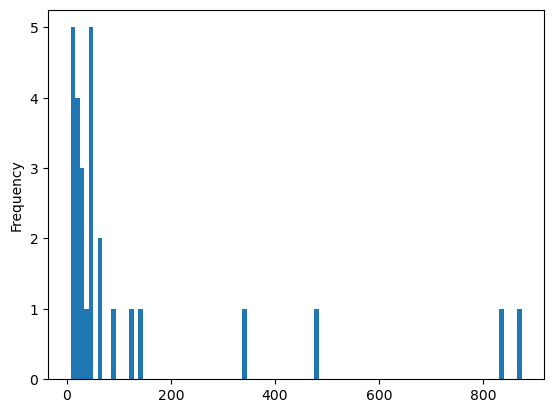

In [32]:
df["GENRE"].value_counts().plot(bins=100, kind='hist')

In [33]:
df['DESCRIPTION'].describe()

count                                                  3500
unique                                                 3498
top        olga, masha, and irina prozoroff lead lonely ...
freq                                                      2
Name: DESCRIPTION, dtype: object

In [34]:
df['msg_length'] = df['DESCRIPTION'].apply(len)
df

C:\Users\AL\AppData\Local\Temp\ipykernel_7484\814881254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['msg_length'] = df['DESCRIPTION'].apply(len)


,Unnamed: 0,TITLE,GENRE,DESCRIPTION,msg_length,Cleaned_Description,tokens,msg_without_stopwords,lemmatized_text
0,1,Oscar et la dame rose (2009),drama,listening in to a conversation between his do...,546,listening in to a conversation between his do...,"[listening, in, to, a, conversation, between, ...","[listening, conversation, doctor, parents, yea...","[listen, conversation, doctor, parent, yearold..."
1,2,Cupid (1997),thriller,a brother and sister with a past incestuous r...,184,a brother and sister with a past incestuous r...,"[a, brother, and, sister, with, a, past, inces...","[brother, sister, past, incestuous, relationsh...","[brother, sister, past, incestuous, relationsh..."
2,3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fie...,650,as the bus empties the students for their fie...,"[as, the, bus, empties, the, students, for, th...","[bus, empties, students, field, trip, museum, ...","[bus, empty, students, field, trip, museum, na..."
3,4,The Secret Sin (1915),drama,to help their unemployed father make ends mee...,1082,to help their unemployed father make ends mee...,"[to, help, their, unemployed, father, make, en...","[help, unemployed, father, make, ends, meet, e...","[help, unemployed, father, make, end, meet, ed..."
4,5,The Unrecovered (2007),drama,the film's title refers not only to the un-re...,625,the films title refers not only to the unreco...,"[the, films, title, refers, not, only, to, the...","[films, title, refers, unrecovered, bodies, gr...","[film, title, refer, unrecovered, body, grind,..."
...,...,...,...,...,...,...,...,...,...
3495,3496,Les possédées du diable (1974),horror,the businessman patrick takes his wife marian...,223,the businessman patrick takes his wife marian...,"[the, businessman, patrick, takes, his, wife, ...","[businessman, patrick, takes, wife, marianne, ...","[businessman, patrick, take, wife, marianne, d..."
3496,3497,Mistaken Identity (2006/II),comedy,indiana tourists herbert and darlene are visi...,389,indiana tourists herbert and darlene are visi...,"[indiana, tourists, herbert, and, darlene, are...","[indiana, tourists, herbert, darlene, visiting...","[indiana, tourists, herbert, darlene, visit, n..."
3497,3498,Project Turmoil (2009),documentary,"""project turmoil"" is a shocking and brutal ac...",356,project turmoil is a shocking and brutal acco...,"[project, turmoil, is, a, shocking, and, bruta...","[project, turmoil, shocking, brutal, account, ...","[project, turmoil, shock, brutal, account, not..."
3498,3499,"""Princess Sarah"" (2007)",drama,the story is about a princess named sarah cre...,369,the story is about a princess named sarah cre...,"[the, story, is, about, a, princess, named, sa...","[story, princess, named, sarah, crewe, lives, ...","[story, princess, name, sarah, crewe, live, el..."


In [13]:
df['msg_length'].describe()

count     3500.000000
mean       607.404857
std        465.876790
min         77.000000
25%        326.000000
50%        472.000000
75%        719.000000
max      10504.000000
Name: msg_length, dtype: float64

In [14]:
df[df['msg_length']==10504]['DESCRIPTION'].iloc[0]

' Guy Gabaldon died on August 31, 2006 and the world lost someone very special. During the bloody struggle for Saipan in July 1944, U.S. Marine PFC Guy Gabaldon is indeed officially credited with capturing over 1500 Japanese soldiers and civilians - singlehandedly, a record that is untouchable in the annals of American military history. For over sixty years, Guy talked about his exploits on that island, sharing his experience and using his celebrity to inspire new generations who valued bravery and bravado. However, war experience alone does not make a life, and Guy\'s didn\'t stop in 1944. He lived many different lives and most importantly he took it upon himself to help the less fortunate, particularly the wayward teenagers he encountered when he returned to the Mariana Islands in 1980, where he would live for twenty years. Guy Gabaldon grew up in East Los Angeles where he spent more time on the streets than at home. He would get into fights and he was thrown out of school at one poi

array([[<Axes: title={'center': ' action '}>,
        <Axes: title={'center': ' adult '}>,
        <Axes: title={'center': ' adventure '}>,
        <Axes: title={'center': ' animation '}>,
        <Axes: title={'center': ' biography '}>],
       [<Axes: title={'center': ' comedy '}>,
        <Axes: title={'center': ' crime '}>,
        <Axes: title={'center': ' documentary '}>,
        <Axes: title={'center': ' drama '}>,
        <Axes: title={'center': ' family '}>],
       [<Axes: title={'center': ' fantasy '}>,
        <Axes: title={'center': ' game-show '}>,
        <Axes: title={'center': ' history '}>,
        <Axes: title={'center': ' horror '}>,
        <Axes: title={'center': ' music '}>],
       [<Axes: title={'center': ' musical '}>,
        <Axes: title={'center': ' mystery '}>,
        <Axes: title={'center': ' news '}>,
        <Axes: title={'center': ' reality-tv '}>,
        <Axes: title={'center': ' romance '}>],
       [<Axes: title={'center': ' sci-fi '}>,
        <A

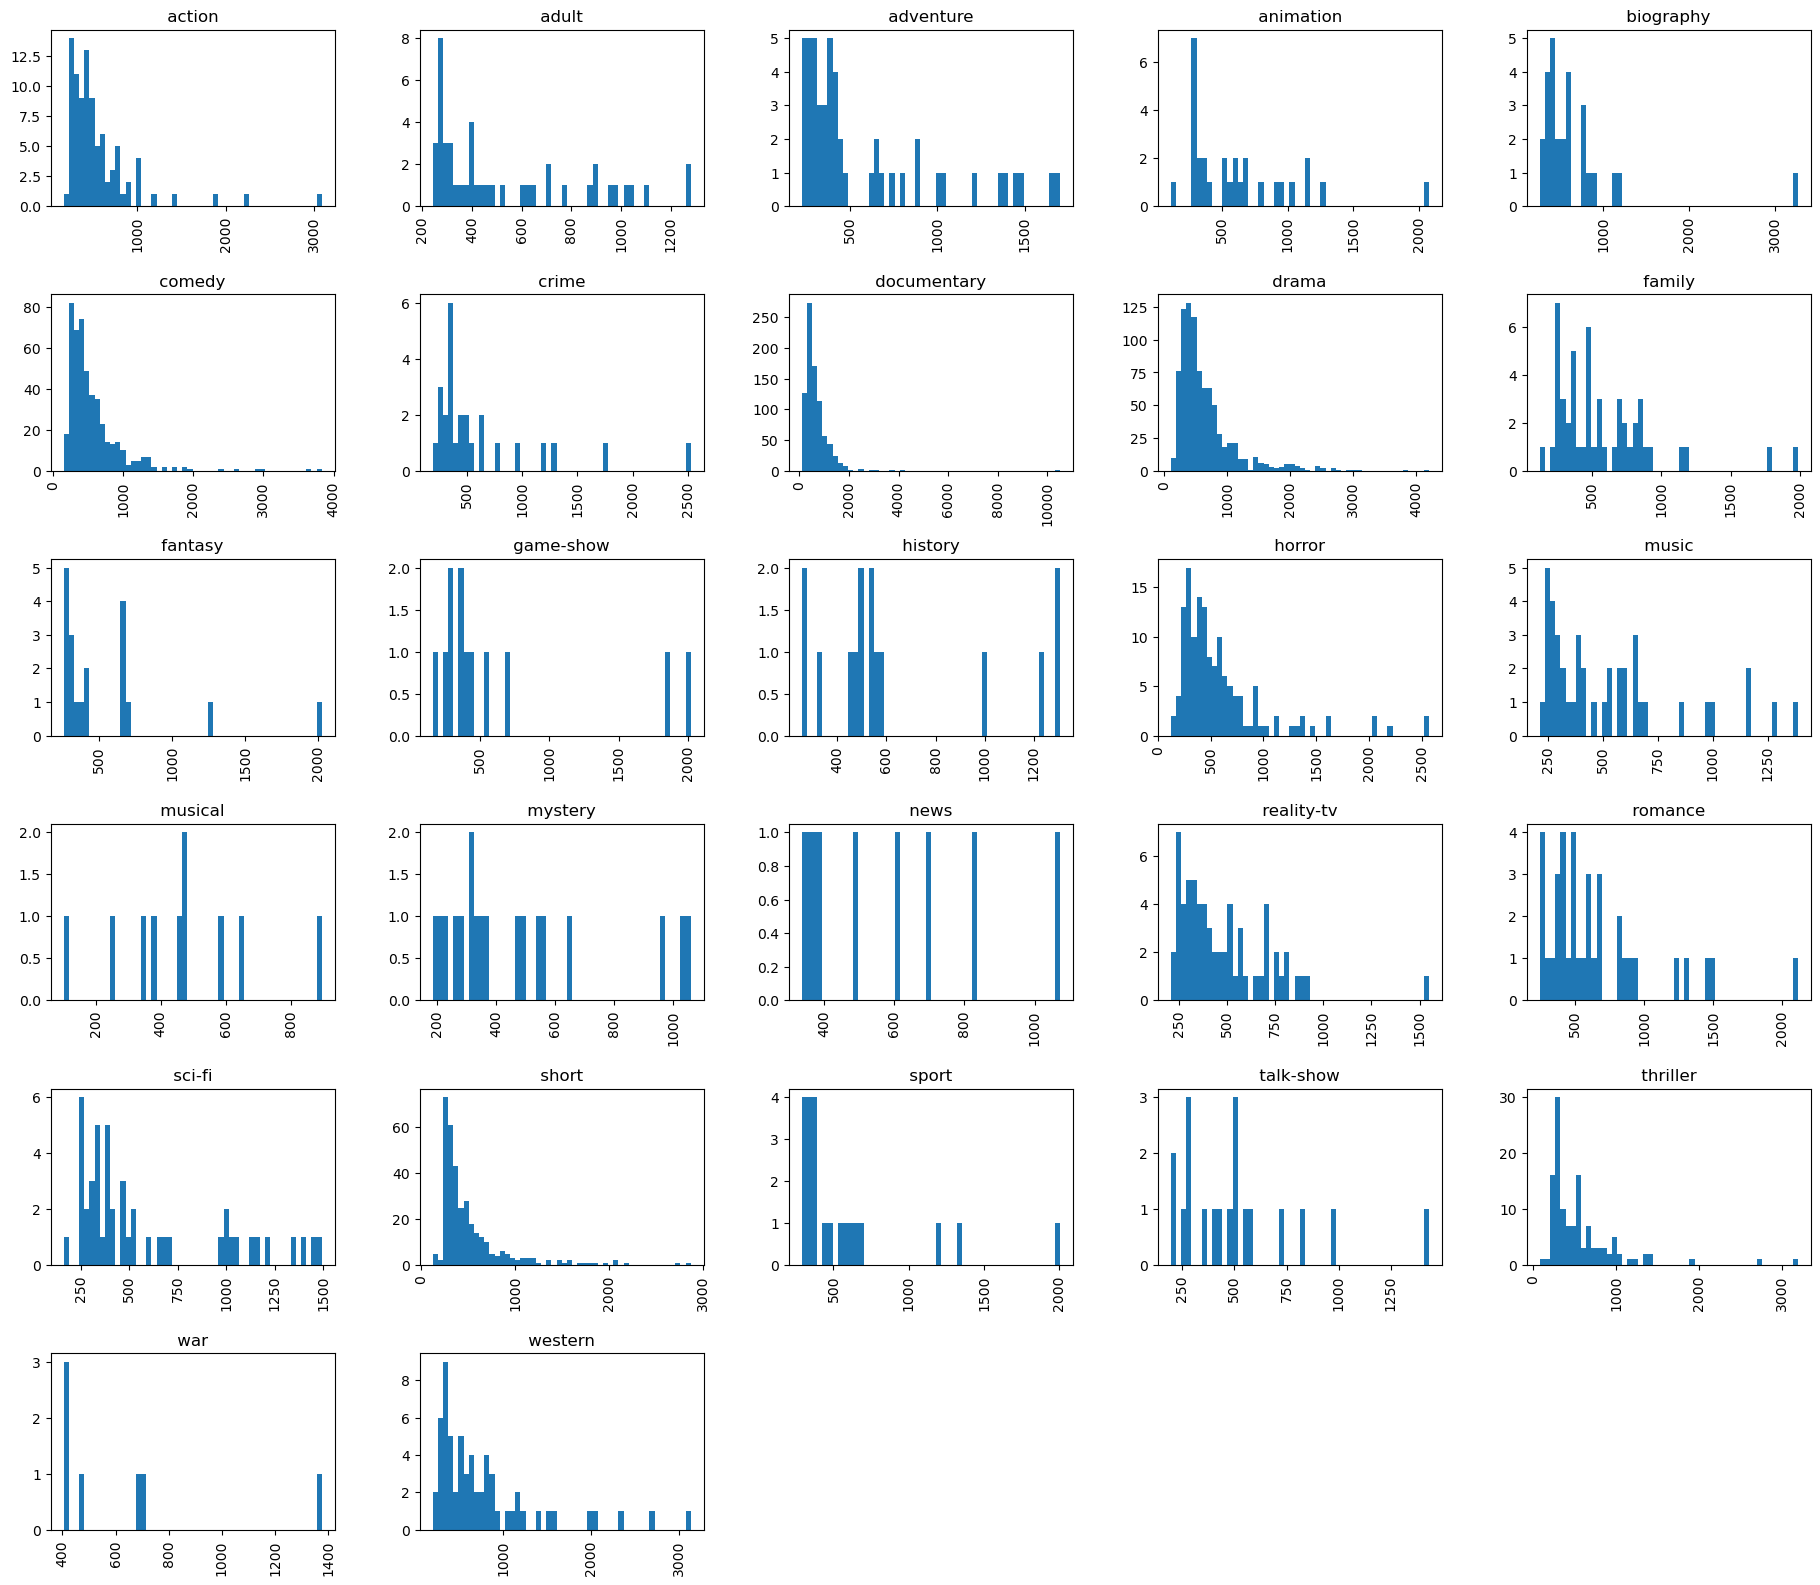

In [15]:
df.hist(column='msg_length', by='GENRE', bins=50,figsize=(22,20))

# Data preprocessing

In [35]:
import re
import pandas as pd

def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r"<[^>]+>", "", text)
    # Remove special characters, numbers, and URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"http\S+", "", text)
    return text

# Convert the 'DESCRIPTION' column to lowercase
df['DESCRIPTION'] = df['DESCRIPTION'].str.lower()

# Apply the preprocessing function to the 'DESCRIPTION' column
df['Cleaned_Description'] = df['DESCRIPTION'].apply(preprocess_text)

# Display the DataFrame with cleaned descriptions
print(df[ 'Cleaned_Description'])
df

C:\Users\AL\AppData\Local\Temp\ipykernel_7484\1173180072.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DESCRIPTION'] = df['DESCRIPTION'].str.lower()


0        listening in to a conversation between his do...
1        a brother and sister with a past incestuous r...
2        as the bus empties the students for their fie...
3        to help their unemployed father make ends mee...
4        the films title refers not only to the unreco...
                              ...                        
3495     the businessman patrick takes his wife marian...
3496     indiana tourists herbert and darlene are visi...
3497     project turmoil is a shocking and brutal acco...
3498     the story is about a princess named sarah cre...
3499      german philosopher friedrich nietzsche witne...
Name: Cleaned_Description, Length: 3500, dtype: object


C:\Users\AL\AppData\Local\Temp\ipykernel_7484\1173180072.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned_Description'] = df['DESCRIPTION'].apply(preprocess_text)


,Unnamed: 0,TITLE,GENRE,DESCRIPTION,msg_length,Cleaned_Description,tokens,msg_without_stopwords,lemmatized_text
0,1,Oscar et la dame rose (2009),drama,listening in to a conversation between his do...,546,listening in to a conversation between his do...,"[listening, in, to, a, conversation, between, ...","[listening, conversation, doctor, parents, yea...","[listen, conversation, doctor, parent, yearold..."
1,2,Cupid (1997),thriller,a brother and sister with a past incestuous r...,184,a brother and sister with a past incestuous r...,"[a, brother, and, sister, with, a, past, inces...","[brother, sister, past, incestuous, relationsh...","[brother, sister, past, incestuous, relationsh..."
2,3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fie...,650,as the bus empties the students for their fie...,"[as, the, bus, empties, the, students, for, th...","[bus, empties, students, field, trip, museum, ...","[bus, empty, students, field, trip, museum, na..."
3,4,The Secret Sin (1915),drama,to help their unemployed father make ends mee...,1082,to help their unemployed father make ends mee...,"[to, help, their, unemployed, father, make, en...","[help, unemployed, father, make, ends, meet, e...","[help, unemployed, father, make, end, meet, ed..."
4,5,The Unrecovered (2007),drama,the film's title refers not only to the un-re...,625,the films title refers not only to the unreco...,"[the, films, title, refers, not, only, to, the...","[films, title, refers, unrecovered, bodies, gr...","[film, title, refer, unrecovered, body, grind,..."
...,...,...,...,...,...,...,...,...,...
3495,3496,Les possédées du diable (1974),horror,the businessman patrick takes his wife marian...,223,the businessman patrick takes his wife marian...,"[the, businessman, patrick, takes, his, wife, ...","[businessman, patrick, takes, wife, marianne, ...","[businessman, patrick, take, wife, marianne, d..."
3496,3497,Mistaken Identity (2006/II),comedy,indiana tourists herbert and darlene are visi...,389,indiana tourists herbert and darlene are visi...,"[indiana, tourists, herbert, and, darlene, are...","[indiana, tourists, herbert, darlene, visiting...","[indiana, tourists, herbert, darlene, visit, n..."
3497,3498,Project Turmoil (2009),documentary,"""project turmoil"" is a shocking and brutal ac...",356,project turmoil is a shocking and brutal acco...,"[project, turmoil, is, a, shocking, and, bruta...","[project, turmoil, shocking, brutal, account, ...","[project, turmoil, shock, brutal, account, not..."
3498,3499,"""Princess Sarah"" (2007)",drama,the story is about a princess named sarah cre...,369,the story is about a princess named sarah cre...,"[the, story, is, about, a, princess, named, sa...","[story, princess, named, sarah, crewe, lives, ...","[story, princess, name, sarah, crewe, live, el..."


In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [36]:
import nltk
from nltk.tokenize import word_tokenize

# Tokenize function
def tokenize_text(text):
    return word_tokenize(text)

# Apply tokenization to the 'text_column' and create a new column 'tokens'
df['tokens'] = df['Cleaned_Description'].apply(tokenize_text)

# Print the DataFrame with tokens
print(df[ 'tokens'])


0       [listening, in, to, a, conversation, between, ...
1       [a, brother, and, sister, with, a, past, inces...
2       [as, the, bus, empties, the, students, for, th...
3       [to, help, their, unemployed, father, make, en...
4       [the, films, title, refers, not, only, to, the...
                              ...                        
3495    [the, businessman, patrick, takes, his, wife, ...
3496    [indiana, tourists, herbert, and, darlene, are...
3497    [project, turmoil, is, a, shocking, and, bruta...
3498    [the, story, is, about, a, princess, named, sa...
3499    [german, philosopher, friedrich, nietzsche, wi...
Name: tokens, Length: 3500, dtype: object


C:\Users\AL\AppData\Local\Temp\ipykernel_7484\226374222.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['Cleaned_Description'].apply(tokenize_text)


In [37]:
from nltk.corpus import stopwords

# Download the stopwords list if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a list of words
def remove_stopwords(words):
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return filtered_words

# Apply the function to the 'Cleaned_Description' column
df['msg_without_stopwords'] = df['tokens'].apply(remove_stopwords)

# Print the DataFrame with messages without stopwords
print(df['msg_without_stopwords'])



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       [listening, conversation, doctor, parents, yea...
1       [brother, sister, past, incestuous, relationsh...
2       [bus, empties, students, field, trip, museum, ...
3       [help, unemployed, father, make, ends, meet, e...
4       [films, title, refers, unrecovered, bodies, gr...
                              ...                        
3495    [businessman, patrick, takes, wife, marianne, ...
3496    [indiana, tourists, herbert, darlene, visiting...
3497    [project, turmoil, shocking, brutal, account, ...
3498    [story, princess, named, sarah, crewe, lives, ...
3499    [german, philosopher, friedrich, nietzsche, wi...
Name: msg_without_stopwords, Length: 3500, dtype: object


C:\Users\AL\AppData\Local\Temp\ipykernel_7484\1961512966.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['msg_without_stopwords'] = df['tokens'].apply(remove_stopwords)


In [38]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer

# Download the WordNet corpus if not already downloaded
nltk.download('wordnet')

# Function to apply lemmatization to a list of words
def lemmatize_words(words):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return lemmatized_words

# Apply lemmatization to the 'msg_without_stopwords' column
df['lemmatized_text'] = df['msg_without_stopwords'].apply(lemmatize_words)

# Print the DataFrame
print(df['lemmatized_text'])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0       [listen, conversation, doctor, parent, yearold...
1       [brother, sister, past, incestuous, relationsh...
2       [bus, empty, students, field, trip, museum, na...
3       [help, unemployed, father, make, end, meet, ed...
4       [film, title, refer, unrecovered, body, grind,...
                              ...                        
3495    [businessman, patrick, take, wife, marianne, d...
3496    [indiana, tourists, herbert, darlene, visit, n...
3497    [project, turmoil, shock, brutal, account, not...
3498    [story, princess, name, sarah, crewe, live, el...
3499    [german, philosopher, friedrich, nietzsche, wi...
Name: lemmatized_text, Length: 3500, dtype: object


C:\Users\AL\AppData\Local\Temp\ipykernel_7484\2334682892.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized_text'] = df['msg_without_stopwords'].apply(lemmatize_words)


In [20]:
df

,Unnamed: 0,TITLE,GENRE,DESCRIPTION,msg_length,Cleaned_Description,tokens,msg_without_stopwords,lemmatized_text
0,1,Oscar et la dame rose (2009),drama,listening in to a conversation between his do...,546,listening in to a conversation between his do...,"[listening, in, to, a, conversation, between, ...","[listening, conversation, doctor, parents, yea...","[listen, conversation, doctor, parent, yearold..."
1,2,Cupid (1997),thriller,a brother and sister with a past incestuous r...,184,a brother and sister with a past incestuous r...,"[a, brother, and, sister, with, a, past, inces...","[brother, sister, past, incestuous, relationsh...","[brother, sister, past, incestuous, relationsh..."
2,3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fie...,650,as the bus empties the students for their fie...,"[as, the, bus, empties, the, students, for, th...","[bus, empties, students, field, trip, museum, ...","[bus, empty, students, field, trip, museum, na..."
3,4,The Secret Sin (1915),drama,to help their unemployed father make ends mee...,1082,to help their unemployed father make ends mee...,"[to, help, their, unemployed, father, make, en...","[help, unemployed, father, make, ends, meet, e...","[help, unemployed, father, make, end, meet, ed..."
4,5,The Unrecovered (2007),drama,the film's title refers not only to the un-re...,625,the films title refers not only to the unreco...,"[the, films, title, refers, not, only, to, the...","[films, title, refers, unrecovered, bodies, gr...","[film, title, refer, unrecovered, body, grind,..."
...,...,...,...,...,...,...,...,...,...
3495,3496,Les possédées du diable (1974),horror,the businessman patrick takes his wife marian...,223,the businessman patrick takes his wife marian...,"[the, businessman, patrick, takes, his, wife, ...","[businessman, patrick, takes, wife, marianne, ...","[businessman, patrick, take, wife, marianne, d..."
3496,3497,Mistaken Identity (2006/II),comedy,indiana tourists herbert and darlene are visi...,389,indiana tourists herbert and darlene are visi...,"[indiana, tourists, herbert, and, darlene, are...","[indiana, tourists, herbert, darlene, visiting...","[indiana, tourists, herbert, darlene, visit, n..."
3497,3498,Project Turmoil (2009),documentary,"""project turmoil"" is a shocking and brutal ac...",356,project turmoil is a shocking and brutal acco...,"[project, turmoil, is, a, shocking, and, bruta...","[project, turmoil, shocking, brutal, account, ...","[project, turmoil, shock, brutal, account, not..."
3498,3499,"""Princess Sarah"" (2007)",drama,the story is about a princess named sarah cre...,369,the story is about a princess named sarah cre...,"[the, story, is, about, a, princess, named, sa...","[story, princess, named, sarah, crewe, lives, ...","[story, princess, name, sarah, crewe, live, el..."


(54214, 135114)
(54214, 135114)


In [39]:
text_data = df['lemmatized_text'].apply(lambda x: ' '.join(x))
text_data

0       listen conversation doctor parent yearold osca...
1       brother sister past incestuous relationship cu...
2       bus empty students field trip museum natural h...
3       help unemployed father make end meet edith twi...
4       film title refer unrecovered body grind zero a...
                              ...                        
3495    businessman patrick take wife marianne daughte...
3496    indiana tourists herbert darlene visit nations...
3497    project turmoil shock brutal account notorious...
3498    story princess name sarah crewe live elite boa...
3499    german philosopher friedrich nietzsche witness...
Name: lemmatized_text, Length: 3500, dtype: object

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
# Fit and transform the preprocessed text data
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
# Convert the TF-IDF matrix to a DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df
# Print the TF-IDF DataFrame
print(tfidf_df)
tfidf_matrix




      aaa  aalto  aarav  aarohi  aaron  aarons  aarti  aartis   ab  aba  ...  \
0     0.0    0.0    0.0     0.0    0.0     0.0    0.0     0.0  0.0  0.0  ...   
1     0.0    0.0    0.0     0.0    0.0     0.0    0.0     0.0  0.0  0.0  ...   
2     0.0    0.0    0.0     0.0    0.0     0.0    0.0     0.0  0.0  0.0  ...   
3     0.0    0.0    0.0     0.0    0.0     0.0    0.0     0.0  0.0  0.0  ...   
4     0.0    0.0    0.0     0.0    0.0     0.0    0.0     0.0  0.0  0.0  ...   
...   ...    ...    ...     ...    ...     ...    ...     ...  ...  ...  ...   
3495  0.0    0.0    0.0     0.0    0.0     0.0    0.0     0.0  0.0  0.0  ...   
3496  0.0    0.0    0.0     0.0    0.0     0.0    0.0     0.0  0.0  0.0  ...   
3497  0.0    0.0    0.0     0.0    0.0     0.0    0.0     0.0  0.0  0.0  ...   
3498  0.0    0.0    0.0     0.0    0.0     0.0    0.0     0.0  0.0  0.0  ...   
3499  0.0    0.0    0.0     0.0    0.0     0.0    0.0     0.0  0.0  0.0  ...   

      zuleiia  zuleikas  zulkifli  zumb

<3500x26171 sparse matrix of type '<class 'numpy.float64'>'
	with 168675 stored elements in Compressed Sparse Row format>

In [23]:
labels=df["GENRE"]
labels


0              drama 
1           thriller 
2              adult 
3              drama 
4              drama 
            ...      
3495          horror 
3496          comedy 
3497     documentary 
3498           drama 
3499           drama 
Name: GENRE, Length: 3500, dtype: object

# Model building

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'labels' is a DataFrame or Series containing the labels for your data
# Split the TF-IDF matrix and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(multi_class='multinomial',solver="lbfgs", max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4642857142857143


In [42]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[  0   0   0   0   0   2   0   7   8   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   2   7   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   5   5   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   3   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   4   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  18   0  16  56   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   1   5   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0 147  12   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   6   0  18 157   0   0   0   0   0   0   0   0   0
    

C:\Users\AL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.svm import SVC


# Create an SVM classifier
model = SVC(kernel='linear', C=1.0)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5057142857142857


In [30]:
model.score(X_train,y_train)

0.925

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters grid for grid search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"\nAccuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

C:\Users\AL\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
